In [1]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [3]:
df<-read.csv('./Delivery_Time.csv')

<b>When Regressor is Random Variable</b><br>

In [4]:
colnames(df)<-c('Time','Case')

자판기 배달 물량이 많을 수록 시간이 오래 걸릴까?<br>
25개의 소매점 랜덤으로 방문<br>
배달원이 랜덤으로 선택 됐는데 X를 constant라고 두는게 맞나? X도 r.v. 아닌가?

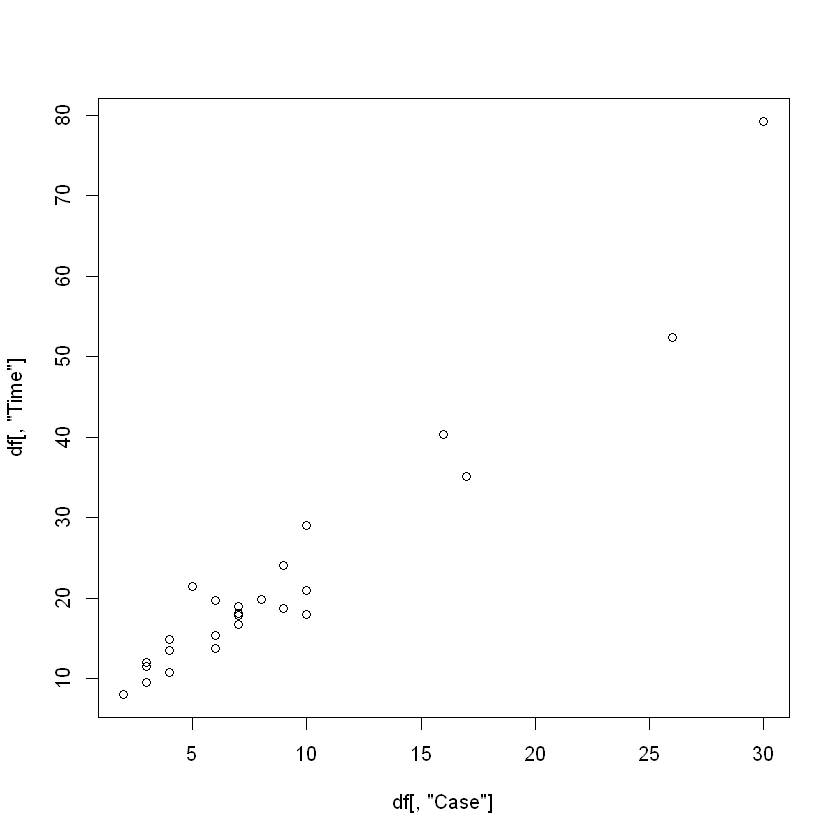

In [6]:
plot(df[,'Case'],df[,'Time'])

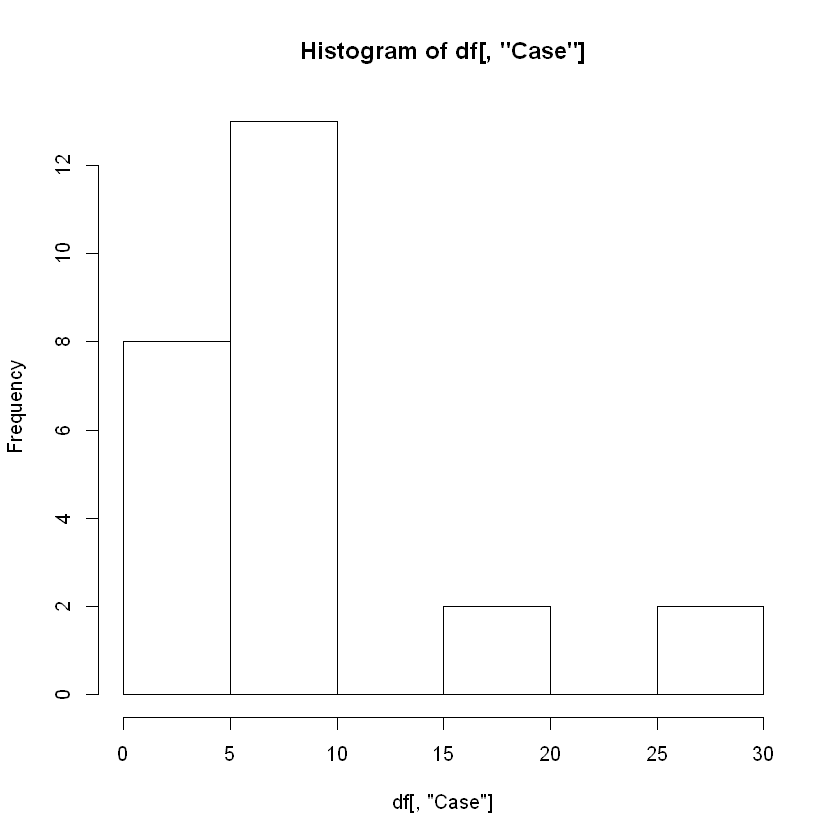

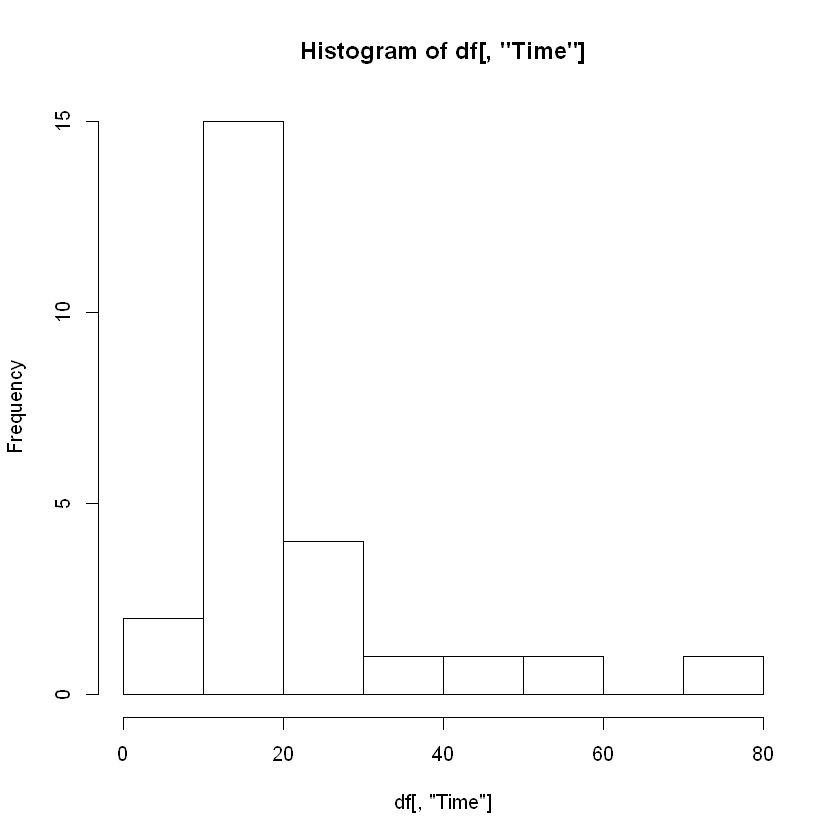

In [7]:
hist(df[,'Case']);hist(df[,'Time'])

x,y가 bivariate normal 따른다고 가정

In [8]:
fit<-lm(Time~Case,data=df)

In [9]:
coef(fit)

(Intercept)        Case 
   3.320780    2.176167

y|x 의 분포이기 때문에 coeff는 같아짐<br>
이제 x,y의 correlation에 대한 inference가 가능해짐

In [10]:
r=cor(df[,1],df[,2])
r

[1] 0.9646146

H0: p=0<br>
H1: not H0

In [11]:
n=dim(df)[1]
t=(r*(n-2)^0.5) / ((1-r^2)^0.5)
t

[1] 17.54555

In [12]:
qt(0.975,23)

[1] 2.068658

# Multiple Linear Regression

이제 드라이버의 이동 거리를 나타내는 distance 변수 추가

In [14]:
df2<-read.csv('./Delivery_Time2.csv')

In [15]:
colnames(df2)<-c('Time','Case','Distance')

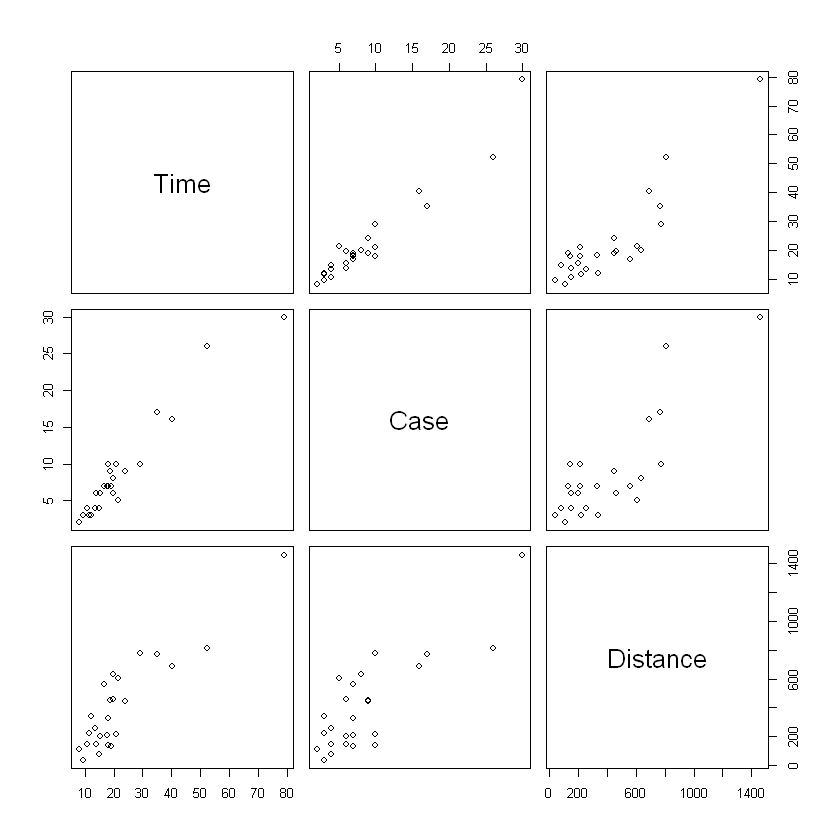

In [16]:
plot(df2)

<b>scatter plot matrix</b><br>
numerical summary보다 좋을 수 있음, response와 regressor들의 관계를 볼 수 있음<br>
하지만 x 에대한 y 값이 중복 되는 데이터가 있을 경우 잘 못된 정보를 줄 수도 있음<br>
dominant한 regressor 존재하고, regressor끼리 nearly linearly independent 할 때 가장 유용함

In [17]:
fit2<-lm(Time~.,data=df2)
fit0 <- lm(Time ~ 1,data=df2)

In [18]:
summary(fit2)
summary(fit2)$r.squared 


Call:
lm(formula = Time ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
Case        1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


[1] 0.9595937

In [19]:
anova(fit0,fit2)
anova(fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
24,5784.5426,NA,NA,NA,NA
22,233.7317,2,5550.811,261.2351,4.687422e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


<b>Test for Significance of Regression <br></b>
anova 가설: H0:B0=B1=B2, H1:not H0 <br>
anova 1번의 2번이 SSR로 F가 매우 높아 가설 기각(regressor중 딜리버리 타임과 관련 있는 것 존재)<br>

<b> adj R2 </b><br>
R^2가 0.96으로 변수 하나일 때(0.93) 보다 높아짐 : R^2는 변수 추가하면 절대 감소 안함 <br>
adj R^2는 같음 : 변수를 추가할 때 MSres를 감소시키면 증가<br>


<b>Tests on Individual Regression Coefficients <br></b>
-partial tests<br>
H0: bj=0, H1: not H0<br>
Distance 회귀 계수 유의: Case 변수가 주어졌을 때 Distance는 모형에 기여함

<b>Extra-sum-of-squares method <br></b>
-subset의 기여도를 볼 수 있음<br>


In [20]:
anova(fit2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


H0:B2=0<br>
F0=15.85로 reject H0 : Distance가 모형에 유의하게 기여

<b>CI for Coefficient <br></b>

In [21]:
confint(fit2)

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
Case,1.261824662,1.96998976
Distance,0.006891745,0.02187791


In [22]:
mean_response <- predict(fit2, newdata=data.frame(Case=8,Distance=275), interval="confidence", level=0.95)
mean_response 

,fit,lwr,upr
1,19.22432,17.6539,20.79474


In [23]:
mean_response <- predict(fit2, newdata=data.frame(Case=8,Distance=275), interval='prediction', level=0.95)
mean_response

,fit,lwr,upr
1,19.22432,12.28456,26.16407


<b>Standadized Regression <br></b>

In [24]:
df3<-data.frame(Time=scale(df2$Time),Case=scale(df2$Case), Distance=scale(df2$Distance))

In [25]:
fit_stand<-lm(Time~.,data=df3)
summary(fit_stand)


Call:
lm(formula = Time ~ ., data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37282 -0.04270  0.02811  0.07450  0.47792 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.836e-16  4.199e-02   0.000 1.000000    
Case         7.163e-01  7.568e-02   9.464 3.25e-09 ***
Distance     3.013e-01  7.568e-02   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.21 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


Case의 표준화된 값이 한 단위 증가하면 표준화된 response도 한 단위 증가한다<br>
Case가 Distance 보다 커서 더 중요해 보이지만 다른 샘플이 들어와서 범위가 달라지면 이러한 상대적인 비교 결과가 달라질 수 있다.

# Model Adequacy Checking

<가정><br>
1.y와 x의 관계가 근사하게 linear<br>
2.error의 기댓값 0<br>
3.error의 variance constant<br>
4.error는 상관관계 없음<br>
5.error는 normal 분포<br>

In [26]:
PRESS <- function(linear.model) {
    pr <- residuals(linear.model)/(1 - lm.influence(linear.model)$hat)
    return (pr)
}

In [27]:
Resid<-data.frame(residual=resid(fit2), stardardized=rstandard(fit2) *(1-lm.influence(fit2)$hat)^0.5,in_studentized=rstandard(fit2),hat=lm.influence(fit2)$hat,PRESS=PRESS(fit2),ex_studentized=rstudent(fit2)   )
Resid

residual,stardardized,in_studentized,hat,PRESS,ex_studentized
-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881
1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764
-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177
4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491
-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493
-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728
0.8446235,0.25912883,0.27042496,0.08179867,0.91986749,0.26464769
1.1566049,0.35484408,0.36672118,0.06372559,1.23532680,0.35938983
7.4197062,2.27635117,3.21376278,0.49829216,14.78889824,4.31078012
2.3764129,0.72907878,0.81325432,0.19629595,2.95682585,0.80677584


residual9=7.4197로 커보임<br>
standardized로 봐도 다른거는 +-2안에 있는데 이거는 밖에 있음 <br>
internally studentized로 보면 3.2138로 확연히 큼 <br>
모형이 이 점에 대해 fit이 잘 안됨을 알 수 있음

In [28]:
df2[9,]

,Time,Case,Distance
9,79.24,30,1460


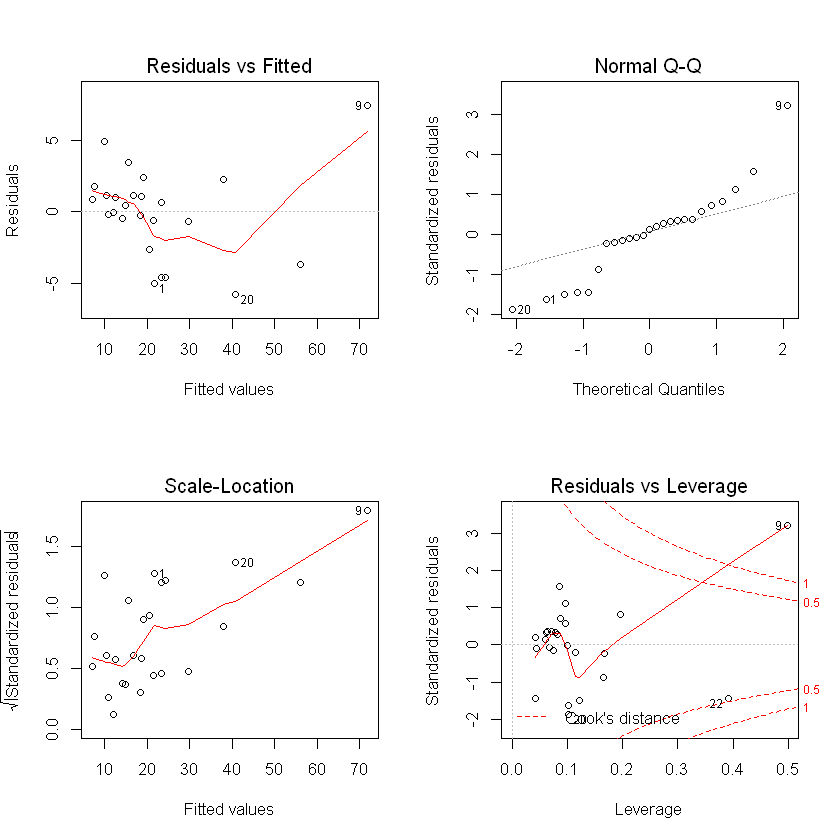

In [29]:
par(mfrow=c(2,2))
plot(fit2)

Normality: plot을 보면 직선에 놓여 있지 않음(꼬리가 너무 두꺼워 보임) -> 한 개 이상의 아웃라이어 있을 듯<br>
Residual vs Fitted value: Misspecification of regressor( transformation 필요?) 없어 보임, inequality of variance 없어 보임<br>

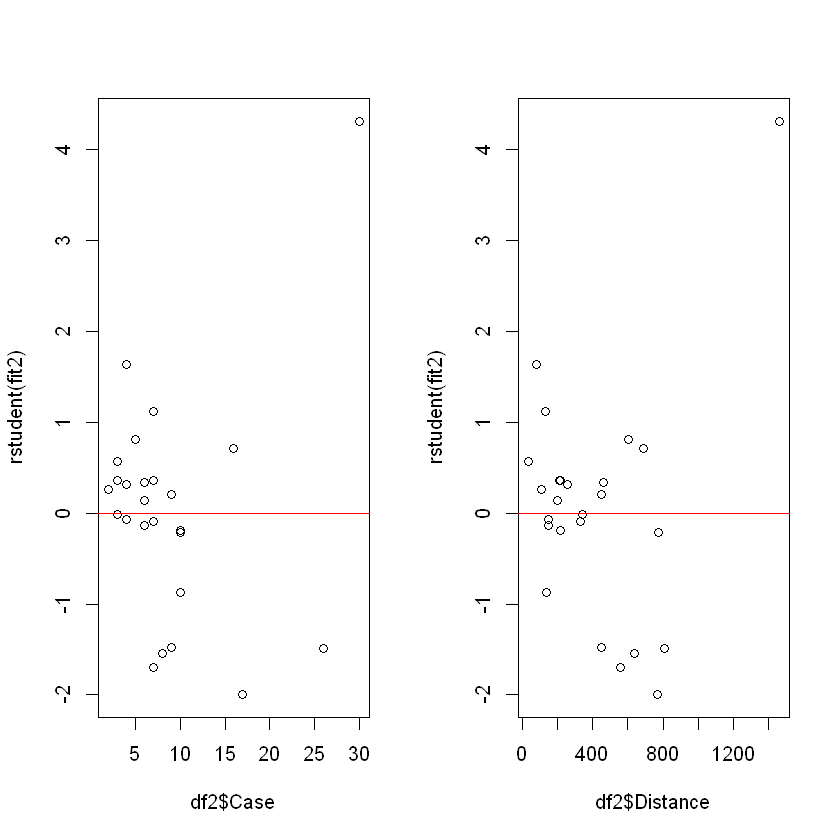

In [30]:
par(mfrow=c(1,2))
plot(df2$Case,rstudent(fit2) );abline(h=0, col="red")
plot(df2$Distance,rstudent(fit2) );abline(h=0, col="red")

regressor와 residual의 관계를 plotting 하는 것은 transformation의 필요성을 항상 볼 수 있는 것은 아님<br>
Omitted variable과 residual의 관계를 보면 potentially include 할지 볼 수 있음<br>
interation effect는 못봄<br>
Multicollinearity가 강하면 잘 못 된 관계를 보여 줄 수 있음

<b>Partial Regression Plot <br></b>
다른 regressor가 주어졌을 때, marginal relationship을 볼 수 있음<br>
이 관계를 보고 transformation을 판단

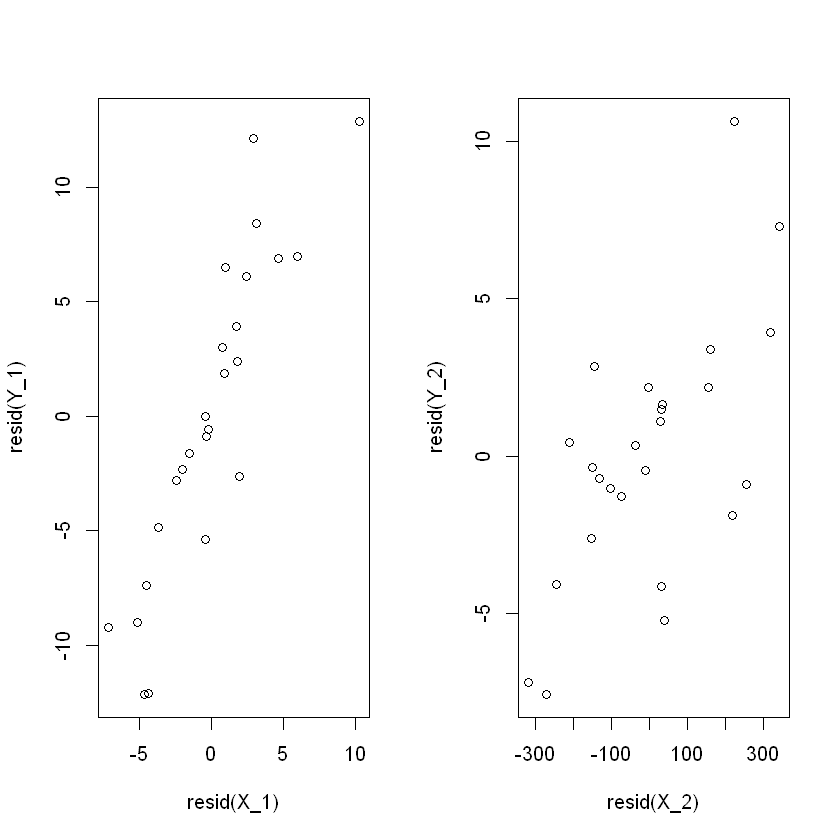

In [31]:
Y_1<-lm(Time~Distance,data=df2)
X_1<-lm(Case~Distance,data=df2)
Y_2<-lm(Time~Case,data=df2)
X_2<-lm(Distance~Case,data=df2)

par(mfrow=c(1,2))
plot( resid(X_1),resid(Y_1) )
plot( resid(X_2),resid(Y_2) )

두 변수다 linear relationship이 명백

<b>PRESS STATISTICS <br></b>

In [32]:
233.7317
sum( PRESS(fit2)^2)

[1] 233.7317

[1] 459.0393

SSres에 비해 PRESS STAT이 2배가 넘음 -> 절반이 넘는 PRESS STAT이 point 9에 기여했기 때문<br>
이 모델이 extrapolation에 취약함을 알 수 있음<br>
PRESS STAT은 모델 간 비교에도 사용 가능

In [33]:
1-(sum( PRESS(fit2)^2)/5784.5426)

[1] 0.9206438

이 모델이 새로운 관측치를 예측하는데 있어 92.09%의 변동성을 설명할 수 있고, 원래 데이터에서는 95.96% 설명 가능<br>
좋아 보이지만 점 9는 잘 예측 못했다는 것을 기억해야 됨

<b>Lack of Fit <br></b>

Systematic lack of fit이 존재하는지 판단: Quadratic term을 추가할지, 혹은 다른 regressor를 추가해야 되는지<br>
Replicated observation 필요<br>
H0: E[yi]=B0+B1xi<br>
H1: not H0<br>
Reject H0면, 더 적합한 모형을 찾아야 됨

In [35]:
df_lack<-read.csv('./ex4.8.csv')

In [36]:
fit_lack<-lm(y~x,data=df_lack)

In [37]:
summary(fit_lack)


Call:
lm(formula = y ~ x, data = df_lack)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4536 -1.6158  0.5638  2.6358  7.4246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.2139     2.6649   4.959 0.000172 ***
x             2.1304     0.5645   3.774 0.001839 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.084 on 15 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4528 
F-statistic: 14.24 on 1 and 15 DF,  p-value: 0.001839


In [38]:
anova(fit_lack)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,237.4788,237.47877,14.2411,0.001839409
Residuals,15,250.1338,16.67559,NA,NA


# Leverage and Influence 

In [39]:
p=dim(df2)[2]
n<-dim(df2)[1]
Criterion=2*p/n #h_ii가 Criterion 보다 크면 leverage point로
hii<-lm.influence(fit2)$hat

In [40]:
OUTLIERS<-rep(NA,n)
for (i in 1:n){
    if (hii[i]>Criterion){
        OUTLIERS[i]<-i
    }
}

In [41]:
na.omit(OUTLIERS) #Criterion 보다 큰 hii

[1]  9 22
attr(,"na.action")
 [1]  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
attr(,"class")
[1] "omit"

hat element로 봤을 때 포인트 9,22가 leverage point이다.<br>
위에서 internally나 externally studentized residual은 22에 대해 별로 크지 않았어서 influential point 아닐 것이다<br>
하지만 포인트 9에 대해서는 커서 influential 가능성 높다.


In [42]:
coef(lm(Time~.,data=df2)) #9,22 in
coef(lm(Time~.,data=df2[-9,])) #22 in
coef(lm(Time~.,data=df2[-22,])) #9 in
coef(lm(Time~.,data=df2[-c(9,22),])) #no


(Intercept)        Case    Distance 
 2.34123115  1.61590721  0.01438483

(Intercept)        Case    Distance 
 4.44723773  1.49769128  0.01032406

(Intercept)        Case    Distance 
 1.91574039  1.78632361  0.01236911

(Intercept)        Case    Distance 
 4.64269200  1.45560675  0.01054938

9번을 지웠을 때 b1은 28%정도 변화하지만 b2는 90퍼센트나 변화한다.<br>
이것은 x2의 9번 값이 매우 크기 때문일 듯

In [45]:
#install.packages("car", repos='http://cran.us.r-project.org')
library(car)

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"

In [46]:
cooks.distance(fit2)

1            2            3            4            5            6 
1.000921e-01 3.375704e-03 9.455785e-06 7.764718e-02 5.432217e-04 1.231067e-04 
           7            8            9           10           11           12 
2.171604e-03 3.051135e-03 3.419318e+00 5.384516e-02 1.619975e-02 1.596392e-03 
          13           14           15           16           17           18 
2.294737e-03 3.292786e-03 6.319880e-04 3.289086e-03 4.013419e-04 4.397807e-02 
          19           20           21           22           23           24 
1.191868e-02 1.324449e-01 5.086063e-02 4.510455e-01 2.989892e-02 1.023224e-01 
          25 
1.084694e-04

In [47]:
which.max(cooks.distance(fit2))

9 
9

Cook's distance로 봤을 때 가장 높은 것은 9번째 값으로 이 값을 지우면 LSE 추정값이 coefficient의 96% CI의 경계에서 벗어날 것이라는 것을 의미한다<br>
두번째로 높은 22를 지우면 값을 지우면 LSE 추정값이 coefficient의 35% CI의 경계에서 벗어날 것이라는 것을 의미한다.<br>
이것으로 보아 9번은 influential but 22 is not
